In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

sns.set(context='notebook', style='white', font_scale=1.2)

In [2]:
try:
    import crossmapy as cmp
except:
    import sys
    sys.path.append('../')
    import crossmapy as cmp

In [3]:
res_dir = f'results/logistic/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

In [4]:
def main(case, noise):
    str1 = 0.4
    Bxy_list = [0.00, 0.00, 0.00, str1, 0.00]
    Byx_list = [0.00, 0.00, 0.00, 0.00, str1]
    Byz_list = [str1, str1, 0.00, str1, str1]
    Bzy_list = [0.00, 0.00, str1, 0.00, 0.00]
    Bxz_list = [0.00, str1, 0.00, 0.00, 0.00]
    Bzx_list = [str1, 0.00, str1, str1, str1]

    Bxy = Bxy_list[case]
    Byx = Byx_list[case]
    Byz = Byz_list[case]
    Bzy = Bzy_list[case]
    Bxz = Bxz_list[case]
    Bzx = Bzx_list[case]

    embed_dim = 3
    GC = cmp.GrangerCausality(embed_dim=embed_dim)
    TE = cmp.TransferEntropy(embed_dim=embed_dim)
    CCM = cmp.ConvergeCrossMapping(embed_dim=embed_dim)
    PCM = cmp.PartialCrossMapping(embed_dim=embed_dim)
    CMC = cmp.CrossMappingCardinality(embed_dim=embed_dim)
    DCMC = cmp.DirectCrossMappingCardinality(embed_dim=embed_dim)
    
    methods = [GC, TE, CCM, PCM, CMC, DCMC]
    labels = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']

    ntrails = 1
    n_iter = 5000
    seed = 0
    lib_len = 1000

    XYZ = cmp.mul_logistic_3v(Bxy, Byx, Byz, Bzy, Bxz, Bzx, n_trail=ntrails, n_iter=n_iter,
                              seed=seed, noise=noise, n_max_fail=10000)

    np.random.seed(seed)
    starts = np.random.choice(range(n_iter - lib_len), 100, replace=False)

    res_dir = f'results/logistic/'
    
    for i, method in enumerate(methods):
        results = []
        print(f'run case{case+1}: method = {labels[i]}; noise = {noise}')
        for start in tqdm(starts):
            end = lib_len + start
            data = XYZ[0, start + 1: end + 1]
            method.fit(data)
            results.append(cmp.skip_diag_tri(method.scores).ravel())
        np.save(f'{res_dir}case{case+1}_{labels[i]}_noise{noise}.npy', np.array(results))
        print('finish')

In [5]:
for case in range(5):
    main(case, noise=0.003)

run case1: method = GC; noise = 0.003



finish
run case1: method = TE; noise = 0.003



finish
run case1: method = CCM; noise = 0.003



finish
run case1: method = PCM; noise = 0.003



finish
run case1: method = CMC; noise = 0.003



finish
run case1: method = DCMC; noise = 0.003



finish
run case2: method = GC; noise = 0.003



finish
run case2: method = TE; noise = 0.003



finish
run case2: method = CCM; noise = 0.003



finish
run case2: method = PCM; noise = 0.003



finish
run case2: method = CMC; noise = 0.003



finish
run case2: method = DCMC; noise = 0.003



finish
run case3: method = GC; noise = 0.003



finish
run case3: method = TE; noise = 0.003



finish
run case3: method = CCM; noise = 0.003



finish
run case3: method = PCM; noise = 0.003



finish
run case3: method = CMC; noise = 0.003



finish
run case3: method = DCMC; noise = 0.003



finish
run case4: method = GC; noise = 0.003



finish
run case4: method = TE; noise = 0.003



finish
run case4: method = CCM; noise = 0.003



finish
run case4: method = PCM; noise = 0.003



finish
run case4: method = CMC; noise = 0.003



finish
run case4: method = DCMC; noise = 0.003



finish
run case5: method = GC; noise = 0.003



finish
run case5: method = TE; noise = 0.003



finish
run case5: method = CCM; noise = 0.003



finish
run case5: method = PCM; noise = 0.003



finish
run case5: method = CMC; noise = 0.003



finish
run case5: method = DCMC; noise = 0.003



finish


In [ ]:
# if __name__ == '__main__':
#     from multiprocessing import Pool
#     p = Pool(5)

#     for noise in range(8):
#         for case in range(5):
#             r = p.apply_async(main, args=(case, noise, ))
#     p.close()
#     p.join()

In [54]:
gold_seqs = np.array([[0, 1, 0, 0, 0, 1],
                      [0, 0, 0, 0, 1, 1],
                      [0, 1, 0, 1, 0, 0],
                      [0, 1, 1, 0, 0, 1],
                      [1, 1, 0, 0, 0, 1]])
truths = gold_seqs.ravel()

In [55]:
labels = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']
noise = 0.003

Text(0.5, 1.0, 'Truth')

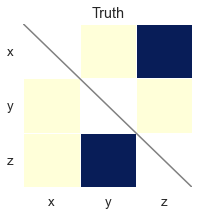

In [56]:
case = 0 # sequential
truth_mat = cmp.score_seq_to_matrix(gold_seqs[case])
truth_mat[np.diag_indices(3)] = np.nan

fig, ax = plt.subplots(figsize=(3, 3))
cmp.plot_score_matrix(truth_mat, labels=['x', 'y', 'z'], ax=ax, annot=False,
                      diag_line=True, cbar=False, annot_kws={'fontsize': 12})
ax.set_title('Truth')

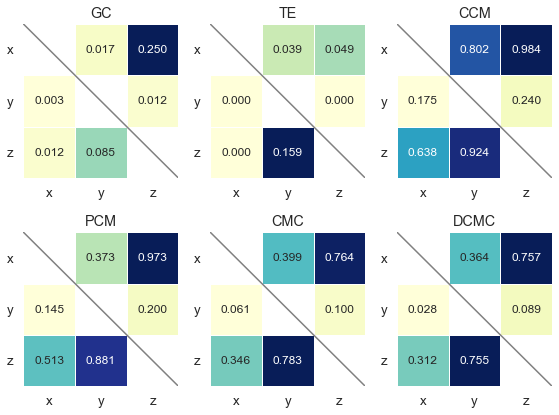

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = cmp.score_seq_to_matrix(score)
    mat[np.diag_indices(3)] = np.nan

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=True, ax=ax[i],
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
plt.tight_layout()

In [58]:
def discretize_score(score, v=0.5):
    out = score.copy()
    out[out >= v] = 1.
    out[out < v] = 0.
    return out

In [59]:
def plot_annot_square(idx, ax=None, **kwargs):
    ys, xs = idx
    if ax is None: fig, ax = plt.subplots()
    for x, y in zip(xs, ys):
        ax.plot([x, x, x+1, x+1, x], [y, y+1, y+1, y, y], **kwargs)
    return ax

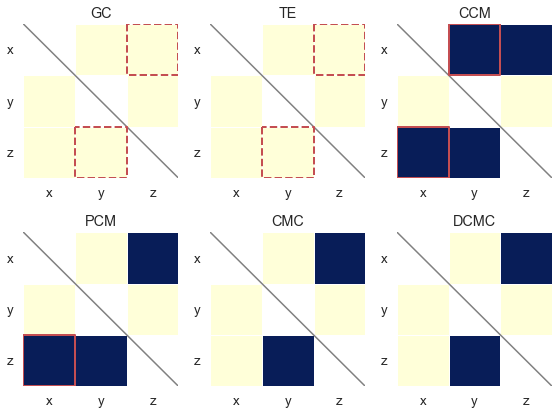

In [60]:
thr = 0.5
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = discretize_score(cmp.score_seq_to_matrix(score), thr)
    mat[np.diag_indices(3)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=False, ax=ax[i],
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
    _ = plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    _ = plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])
plt.tight_layout()

Text(0.5, 1.0, 'Truth')

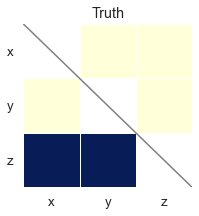

In [61]:
case = 1 # fan-out
truth_mat = cmp.score_seq_to_matrix(gold_seqs[case])
truth_mat[np.diag_indices(3)] = np.nan

fig, ax = plt.subplots(figsize=(3, 3))
cmp.plot_score_matrix(truth_mat, labels=['x', 'y', 'z'], ax=ax, annot=False,
                      diag_line=True, cbar=False, annot_kws={'fontsize': 12})
ax.set_title('Truth')

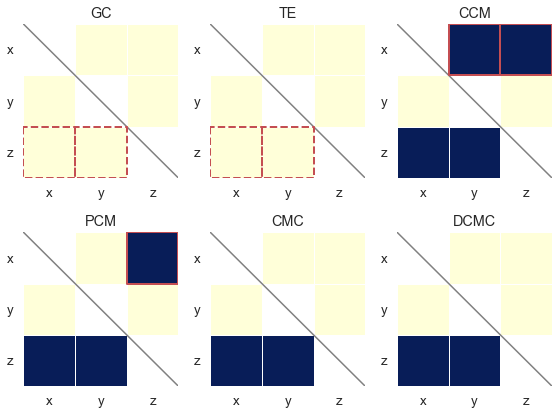

In [62]:
thr = 0.5
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = discretize_score(cmp.score_seq_to_matrix(score), thr)
    mat[np.diag_indices(3)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=False, ax=ax[i],
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
    _ = plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    _ = plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])
plt.tight_layout()

Text(0.5, 1.0, 'Truth')

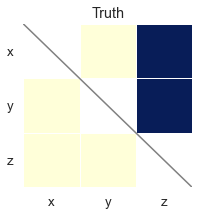

In [63]:
case = 2 # fan-in
truth_mat = cmp.score_seq_to_matrix(gold_seqs[case])
truth_mat[np.diag_indices(3)] = np.nan

fig, ax = plt.subplots(figsize=(3, 3))
cmp.plot_score_matrix(truth_mat, labels=['x', 'y', 'z'], ax=ax, annot=False,
                      diag_line=True, cbar=False, annot_kws={'fontsize': 12})
ax.set_title('Truth')

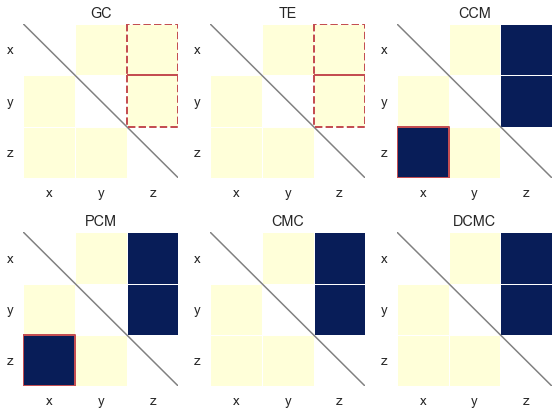

In [64]:
thr = 0.5
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = discretize_score(cmp.score_seq_to_matrix(score), thr)
    mat[np.diag_indices(3)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=False, ax=ax[i],
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
    _ = plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    _ = plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])
plt.tight_layout()

Text(0.5, 1.0, 'Truth')

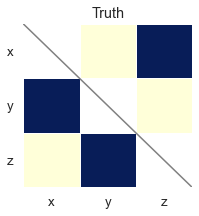

In [65]:
case = 3 # loop
truth_mat = cmp.score_seq_to_matrix(gold_seqs[case])
truth_mat[np.diag_indices(3)] = np.nan

fig, ax = plt.subplots(figsize=(3, 3))
cmp.plot_score_matrix(truth_mat, labels=['x', 'y', 'z'], ax=ax, annot=False,
                      diag_line=True, cbar=False, annot_kws={'fontsize': 12})
ax.set_title('Truth')

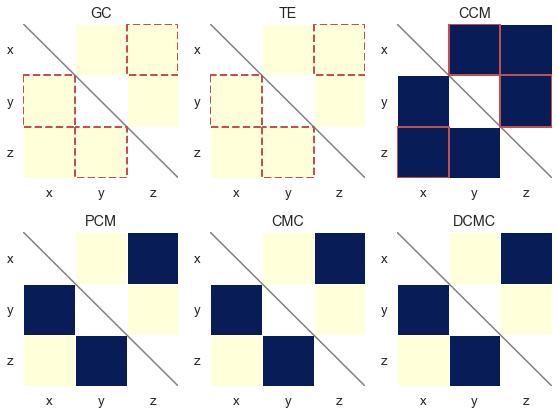

In [71]:
thr = 0.5
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = discretize_score(cmp.score_seq_to_matrix(score), thr)
    mat[np.diag_indices(3)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=False, ax=ax[i],vmin=0, vmax=1,
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
    _ = plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    _ = plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])
plt.tight_layout()

Text(0.5, 1.0, 'Truth')

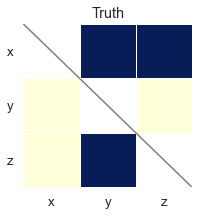

In [72]:
case = 4 # cascade
truth_mat = cmp.score_seq_to_matrix(gold_seqs[case])
truth_mat[np.diag_indices(3)] = np.nan

fig, ax = plt.subplots(figsize=(3, 3))
cmp.plot_score_matrix(truth_mat, labels=['x', 'y', 'z'], ax=ax, annot=False,
                      diag_line=True, cbar=False, annot_kws={'fontsize': 12})
ax.set_title('Truth')

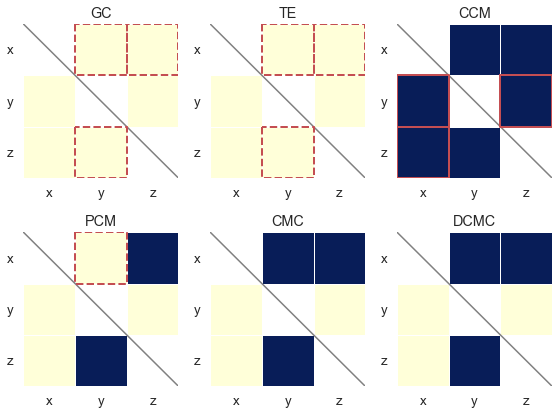

In [73]:
thr = 0.5
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
ax = ax.flatten()
for i, label in enumerate(labels):
    path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
    tmp_dat = np.load(path)
    score = np.mean(tmp_dat, axis=0)
    mat = discretize_score(cmp.score_seq_to_matrix(score), thr)
    mat[np.diag_indices(3)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))

    _ = cmp.plot_score_matrix(mat, labels=['x', 'y', 'z'], annot=False, ax=ax[i],vmin=0, vmax=1,
                               diag_line=True, cbar=False, annot_kws={'fontsize': 12})
    ax[i].set_title(label)
    _ = plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    _ = plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])
plt.tight_layout()

In [74]:
noise = 0.003
res_list = []
for label in labels:
    res = []
    for case in range(5):
        path = f'{res_dir}case{case+1}_{label}_noise{noise}.npy'
        tmp_dat = np.load(path)
        res.append(np.mean(tmp_dat, axis=0))
    res_list.append(np.hstack(res))

acc_list = [cmp.score_to_accuracy(res, truths) for res in res_list]

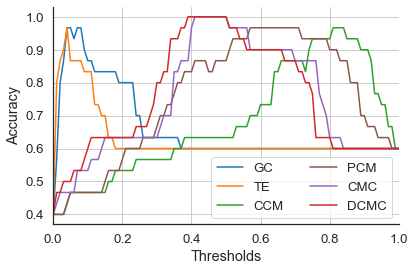

In [78]:
from cycler import cycler

clist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#8c564b', '#9467bd', '#d62728', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(color=clist)
plt.rc('axes', prop_cycle=default_cycler)

ax = cmp.plot_mul_acc_curve(acc_list, labels=labels, legend_kws={'ncol': 2})
sns.despine()